Adrian-Nichita Zloteanu  
MSCS-634  
Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering

First, we load the wine dataset again. We can use the standard head, info & describe functions to find out about its features

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# load wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# examine
display(df.head())
df.info()
display(df.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
# now we standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df) # fit and transform the data

# create dataframe with scaled data for better visualization
df_scaled = pd.DataFrame(X_scaled, columns=wine.feature_names)
display(df_scaled.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874



In the next step, we apply Agglomerative Hierarchical Clustering to the dataset. 
Test different values for n_clusters. Visualize the resulting clusters using scatter plots. Generate and interpret a dendrogram to better understand the hierarchical structure.

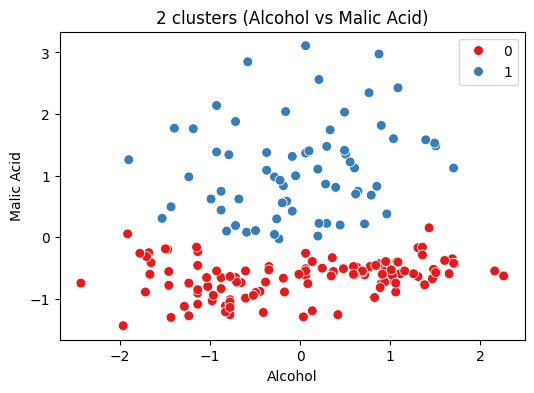

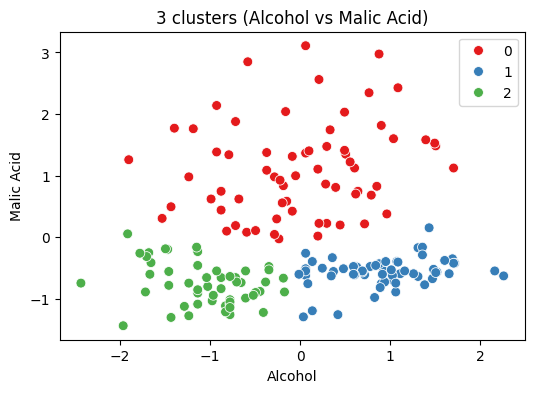

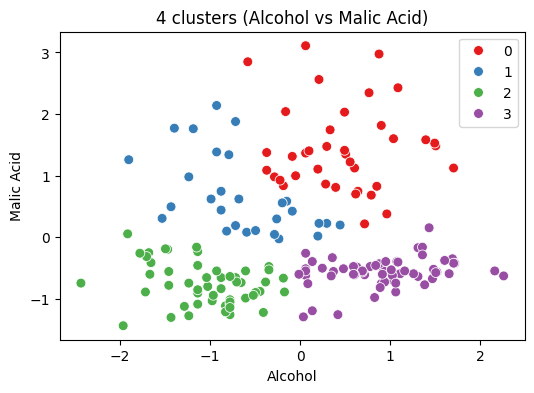

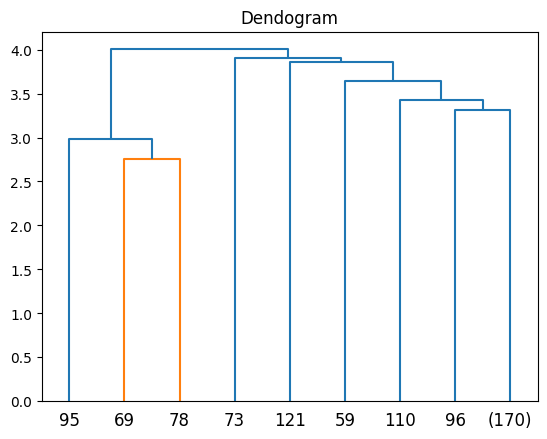

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

X_vis = df_scaled[['alcohol', 'malic_acid']].values

# Try different n_clusters values
for n_clusters in [2, 3, 4]:
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hc.fit_predict(X_vis)
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=labels, palette='Set1', s=50)
    plt.title(f'{n_clusters} clusters (Alcohol vs Malic Acid)')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.show()

# generate a dendrogram for the full set
dendrogram(linkage(df_scaled), truncate_mode='level', p=5)
plt.title('Dendogram')
plt.show()

Next, we apply DBScan to the dataset. After testing, I chose only to use values that return valid clusters, those can be found in the params section.

We will display visualizations of the clusters below, as well as silhouette, homogeneity & completeness scores.

In [18]:
# Only print metrics for DBSCAN runs with more than 1 cluster (excluding noise)
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

X = df_scaled[['alcohol', 'color_intensity']].values

params = [
    (0.3, 3), (0.4, 3), (0.5, 3), (0.6, 3), (0.7, 3), (0.8, 3), (1.0, 3),
    (0.3, 5), (0.4, 5), (0.5, 5), (0.6, 5), (0.7, 5), (0.8, 5), (1.0, 5),
    (0.3, 7), (0.4, 7), (0.5, 7), (0.6, 7), (0.7, 7), (0.8, 7), (1.0, 7)
]
for eps, min_samples in params:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    unique, counts = np.unique(labels, return_counts=True)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = counts[unique == -1][0] if -1 in unique else 0
    if n_clusters > 1:
        print(f"eps={eps}, min_samples={min_samples}, clusters: {n_clusters}, noise points: {n_noise}, labels: {dict(zip(unique, counts))}")
        sil = silhouette_score(X, labels)
        print(f'Silhouette Score: {sil:.2f}')
        print(f'Homogeneity Score: {homogeneity_score(wine.target, labels):.2f}')
        print(f'Completeness Score: {completeness_score(wine.target, labels):.2f}')
    # skip runs with not enough clusters

eps=0.3, min_samples=3, clusters: 7, noise points: 12, labels: {-1: 12, 0: 141, 1: 6, 2: 3, 3: 5, 4: 5, 5: 3, 6: 3}
Silhouette Score: 0.10
Homogeneity Score: 0.17
Completeness Score: 0.21
eps=0.4, min_samples=3, clusters: 3, noise points: 8, labels: {-1: 8, 0: 164, 1: 3, 2: 3}
Silhouette Score: 0.28
Homogeneity Score: 0.05
Completeness Score: 0.15
eps=0.3, min_samples=7, clusters: 3, noise points: 47, labels: {-1: 47, 0: 41, 1: 37, 2: 53}
Silhouette Score: 0.33
Homogeneity Score: 0.45
Completeness Score: 0.35
eps=0.4, min_samples=7, clusters: 2, noise points: 29, labels: {-1: 29, 0: 143, 1: 6}
Silhouette Score: 0.12
Homogeneity Score: 0.13
Completeness Score: 0.24


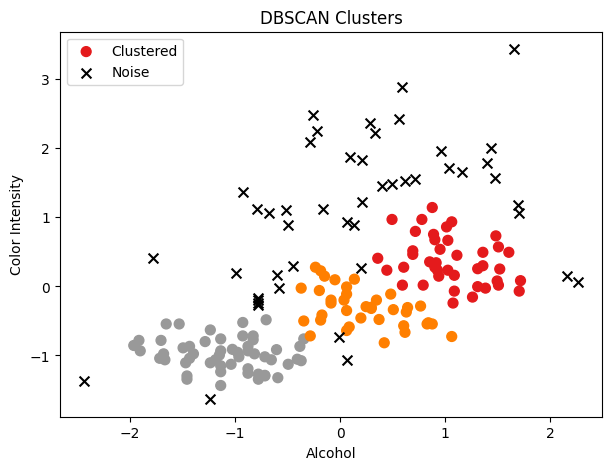

In [21]:
db = DBSCAN(eps=0.3, min_samples=7)
labels = db.fit_predict(X)

plt.figure(figsize=(7,5))
# Core clusters
core_mask = labels != -1
plt.scatter(X[core_mask, 0], X[core_mask, 1], c=labels[core_mask], cmap='Set1', s=50, label='Clustered')
# Noise points
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='black', s=50, marker='x', label='Noise')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title(f'DBSCAN Clusters')
plt.legend()
plt.show()

# Conclusion

Hierarchical gave clean clusters when we picked the right number, but it didn’t flag any noise. DBSCAN was more sensitive — small changes in eps or min_samples totally changed the results.

The best DBSCAN result I could find was at eps=0.3 and min_samples=7. we got 3 well-separated clusters, decent silhouette score at 0.33, and it filtered out a bunch of noise points. At looser settings, it merged too much or added random tiny clusters.

Overall, hierarchical was simpler and more predictable. DBSCAN needed more tuning but handled outliers better and gave a clearer picture of the core groupings. 